## **2.Predict Restaurants Success based on cost,votes,location,cuisines?**

Accuracy: 0.8938953488372093

Confusion Matrix:
 [[4024  144]
 [ 513 1511]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.92      4168
           1       0.91      0.75      0.82      2024

    accuracy                           0.89      6192
   macro avg       0.90      0.86      0.87      6192
weighted avg       0.90      0.89      0.89      6192



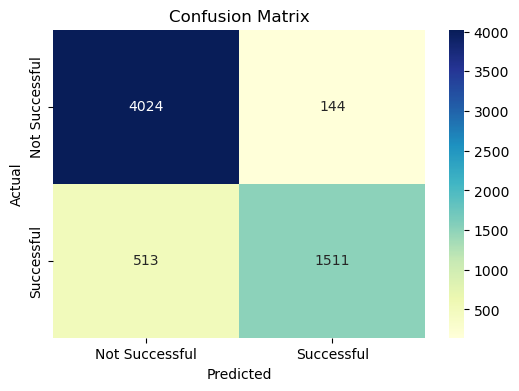

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the cleaned dataset
df = pd.read_csv("C:\\Projects\\DataAnalysisProjects\\ZomatoRestaurantDataAnalysis\\CleanedData\\cleaned_data.csv")

# Create target column: success = 1 if rating >= 4 else 0
df['success'] = np.where(df['rating'] >= 4, 1, 0)

# Feature selection
X = df[['cost', 'votes', 'location', 'cuisines']]
y = df['success']

# One-hot encode categorical features
X = pd.get_dummies(X, columns=['location', 'cuisines'], drop_first=True)

# Scale numerical features for better performance
scaler = StandardScaler()
X[['cost', 'votes']] = scaler.fit_transform(X[['cost', 'votes']])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build logistic regression model
model = LogisticRegression(max_iter=2000)  # Increased max_iter
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Not Successful', 'Successful'], yticklabels=['Not Successful', 'Successful'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig("C:\\Projects\\DataAnalysisProjects\\ZomatoRestaurantDataAnalysis\\Visualizations\\restaurants_success.png", dpi=300, bbox_inches='tight')
plt.show()


# 📌 Logistic Regression Report: Predicting Restaurant Success

---

## 🎯 Objective

To predict whether a restaurant will be **successful** (rating ≥ 4) using the following features:

- **Cost**
- **Votes**
- **Cuisines**
- **Location**

---

## 🧠 Model Used

- **Logistic Regression**
- Logistic Regression is a classification algorithm used when the output is **binary** (Success or Not Success).

---

## 📊 Features Used

After encoding and scaling:

- `cost`  
- `votes`  
- `location` (converted using one-hot encoding)  
- `cuisines` (converted using one-hot encoding)

---

## 🧪 Model Evaluation

Accuracy: 0.8938

Confusion Matrix: [[4024 144] [ 513 1511]]

Classification Report: precision recall f1-score support

yaml
Copy
Edit
       0       0.89      0.97      0.92      4168
       1       0.91      0.75      0.82      2024

accuracy                           0.89      6192
macro avg 0.90 0.86 0.87 6192 weighted avg 0.90 0.89 0.89 6192

yaml
Copy
Edit

---

## 📦 Confusion Matrix Meaning

| Prediction Type        | Explanation                                                                 |
|------------------------|-----------------------------------------------------------------------------|
| **True Negative (TN)** | Model correctly predicted **not successful**: 4024 restaurants               |
| **False Positive (FP)**| Model incorrectly predicted **successful**, but they were **not**: 144       |
| **False Negative (FN)**| Model incorrectly predicted **not successful**, but they **were**: 513       |
| **True Positive (TP)** | Model correctly predicted **successful**: 1511 restaurants                   |

---

## ✅ Summary

- **Accuracy**: 89.38%
- The model is very good at identifying restaurants that are **not successful**.
- Slightly weaker at catching all the **successful** ones due to some false negatives.
- Overall, a strong model for classification.

---

## 📍 Next Steps (Optional Ideas)

- Try other classification models like **Random Forest** or **XGBoost**
- Use **cross-validation** to improve reliability
- Visualize important features to understand what impacts success the